<a href="https://colab.research.google.com/github/AadithS13/Data-Science/blob/main/BigMart_Sales__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Analytics Vidhya/BigMart Item Prediction/train_v9rqX0R.csv')

In [ ]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [ ]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode(),inplace=True)

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

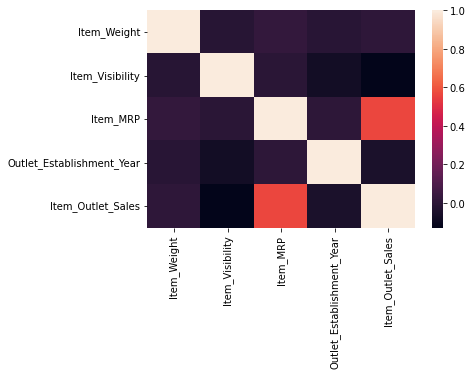

In [ ]:
df_corr = df.corr()
sns.heatmap(df_corr)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

In [ ]:
target = df['Item_Outlet_Sales']
input = df.drop(['Item_Outlet_Sales','Outlet_Size'],axis=1)

In [ ]:
need_to_be_encoded = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in need_to_be_encoded:
  input[i] = le.fit_transform(input[i])

In [ ]:
input.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,156,9.30,1,0.016047,4,249.8092,9,1999,0,1
1,8,5.92,2,0.019278,14,48.2692,3,2009,2,2
2,662,17.50,1,0.016760,10,141.6180,9,1999,0,1
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,0
4,1297,8.93,1,0.000000,9,53.8614,1,1987,2,1


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model = LR.fit(input,target)

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Analytics Vidhya/BigMart Item Prediction/test_AbJTz2l.csv')

In [ ]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
df_test.shape

(5681, 11)

In [ ]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [ ]:

input_test = df_test.drop(['Outlet_Size'],axis=1)

In [ ]:
for i in need_to_be_encoded:
  input_test[i] = le.fit_transform(input_test[i])

In [ ]:
model.predict(input_test)

array([1878.6634455 , 1137.41493323, 2317.35065353, ..., 1752.96564605,
       3120.0690215 , 1138.93493774])

In [ ]:
predicted = model.predict(input_test)
predicted.reshape(-1,1)
predicted.astype(int)

array([1878, 1137, 2317, ..., 1752, 3120, 1138])

In [ ]:
df3 = pd.read_excel('/content/drive/MyDrive/Analytics Vidhya/BigMart Item Prediction/BIgMart_Sales.xlsx')

In [ ]:
df3_final = pd.DataFrame()
df3_final['Item_Identifier'] = df_test['Item_Identifier']
df3_final['Outlet_Identifier'] = df_test['Outlet_Identifier']
df3_final['Item_Outlet_Sales'] = predicted.astype(int)
df3_final.to_csv('/content/drive/MyDrive/Analytics Vidhya/BigMart Item Prediction/BIgMart_Sales.xlsx', header='Item_Identifier')

In [ ]:
df3_final.loc[df3_final['Item_Outlet_Sales'] < 0,['Item_Outlet_Sales']]

,Item_Outlet_Sales
30,-482
46,-892
112,-274
173,-740
199,-139
...,...
5427,-508
5444,-245
5450,-312
5469,-246


In [ ]:
a=df3_final['Item_Outlet_Sales']  
for row,value in enumerate(a):
    if(value>0):
        value==value
    else:
        value=-value
        
    print(value)

In [ ]:
again = df3_final['Item_Outlet_Sales'].abs()
again.iloc[30]

482

In [ ]:
df3_final = pd.DataFrame()
df3_final['Item_Identifier'] = df_test['Item_Identifier']
df3_final['Outlet_Identifier'] = df_test['Outlet_Identifier']
df3_final['Item_Outlet_Sales'] = again
df3_final.to_csv('/content/drive/MyDrive/Analytics Vidhya/BigMart Item Prediction/BIgMart_Sales.xlsx', header='Item_Identifier')